In [2]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
data = pd.read_csv('all-ages.csv')
data.head()

,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000
1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000
2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000
3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000
4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000


In [5]:
print data.Major_category.unique()


['Agriculture & Natural Resources' 'Biology & Life Science' 'Engineering'
 'Humanities & Liberal Arts' 'Communications & Journalism'
 'Computers & Mathematics' 'Industrial Arts & Consumer Services'
 'Education' 'Law & Public Policy' 'Interdisciplinary' 'Health'
 'Social Science' 'Physical Sciences' 'Psychology & Social Work' 'Arts'
 'Business']


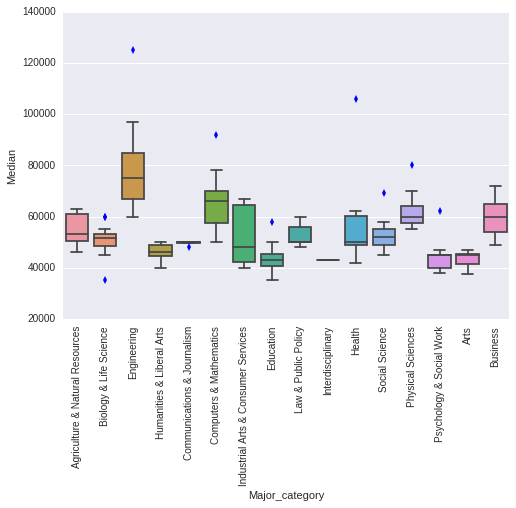

In [8]:
sns.boxplot(data.Major_category,data.Median)
plt.xticks(rotation = 90)
plt.show()


In [10]:
data2 = data[['Major_category','Employed','Unemployed']]
data2.head()

,Major_category,Employed,Unemployed
0,Agriculture & Natural Resources,90245,2423
1,Agriculture & Natural Resources,76865,2266
2,Agriculture & Natural Resources,26321,821
3,Agriculture & Natural Resources,81177,3619
4,Agriculture & Natural Resources,17281,894


In [ ]:
## for cat in data.Major_category.unique():
for i in range(len(data.Major_category.unique())):
    data2.loc[data2['Major_category']==data2.Major_category.unique()[i], 'Major_category'] = i

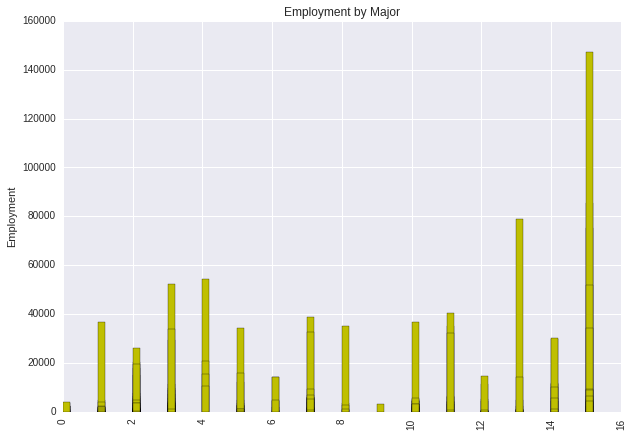

In [66]:
width = .2

plt.figure(figsize=(10,7))
#p1 = plt.bar(data2.Major_category, data2.Employed, width, color='r')
p2 = plt.bar(data2.Major_category, data2.Unemployed, width, color='y')
plt.ylabel('Employment')
plt.title('Employment by Major')
plt.xticks(rotation = 90)
#plt.legend((p1[0], p2[0]), ('Employed', 'Unemployed'))

plt.show()

ValueError: incompatible sizes: argument 'height' must be length 16 or scalar

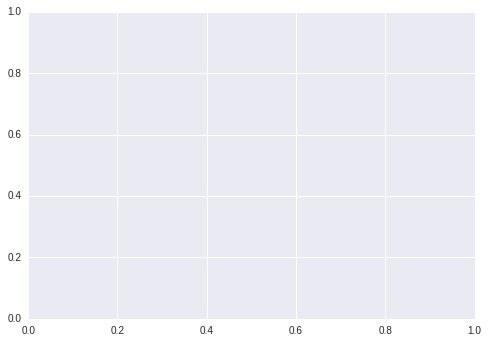

In [40]:
#!/usr/bin/env python
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt



N = len(data2.Major_category.unique())
menMeans   = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)

ind = np.arange(N)    # the x locations for the groups

width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans,   width, color='r')
p2 = plt.bar(ind, womenMeans, width, color='y',
             bottom=menMeans)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind+width/2., ('G1', 'G2', 'G3', 'G4', 'G5') )
plt.yticks(np.arange(0,81,10))
plt.legend( (p1[0], p2[0]), ('Men', 'Women') )

plt.show()

In [53]:
dataCat0=data2[data2['Major_category'] == 0]
dataCat0.employmentSum = dataCat0.sum('Employed')

data
dataCat0.head()



TypeError: unhashable type: 'list'

In [62]:
data3 =data2.groupby('Major_category').sum()


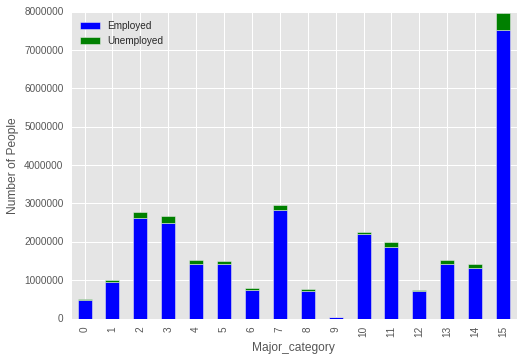

In [68]:
plt.style.use('ggplot')
data3.plot(kind='bar', stacked=True)
plt.ylabel('Number of People')